# AE(自编码器)
在社交网络蓬勃发展的今天，获取海量的样本数据𝒙，如照片、语音、文本等，是相对容易的，但困难的是**获取这些数据所对应的标签信息**，例如机器翻译，除了收集源语言的对话文本外，还需要待翻译的目标语言文本数据。数据的标注工作目前主要还是依赖人的先验知识(Prior Knowledge)来完成.

面对海量的无标注数据，有没有办法能够从中学习到数据的分布𝑃(𝒙)的算法？无监督学习(Unsupervised Learning)算法。  
特别地，如果算法把𝒙作为监督信号来学习，这类算法称为自监督学习(Self-supervised Learning)，自编码器算法就是属于自监督学习范畴.

## 1.AE原理

我们尝试着利用数据𝒙本身作为监督信号来指导网络的训练，即希望神经网络能够学习到映射$𝑓_𝜃$: 𝒙 → $\bar{x}$。我们把网络$𝑓_𝜃$切分为两个部分，前面的子网络尝试学习映射关系:$𝑔_{𝜃_1}$: 𝒙 → 𝒛，后面的子网络尝试学习映射关系$ℎ_{𝜃_2}$: 𝒛 → $\bar{x}$.  
我们把$𝑔_{𝜃_1}$看成一个数据编码(Encode)的过程，把高维度的输入𝒙编码成低维度的隐变量𝒛(Latent Variable，或隐藏变量)，称为 Encoder 网络(编码器)；$ℎ_{𝜃_2}$看成数据解码(Decode)的过程，把编码过后的输入𝒛解码为高维度的𝒙，称为 Decoder 网络(解码器).

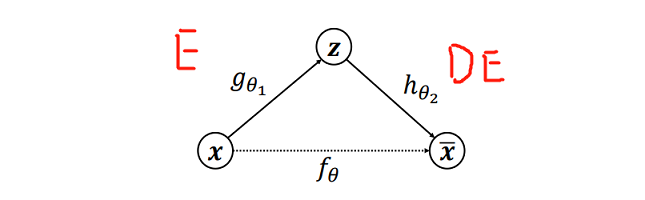

编码器和解码器共同完成了输入数据𝒙的编码和解码过程，我们把整个网络模型$𝑓_𝜃$叫做自动编码器(Auto-Encoder)，简称自编码器。

如果使用深层神经网络来参数化$𝑔_{𝜃_1}$和$ℎ_{𝜃_2}$函数，则称为深度自编码器(Deep Auto-encoder).如图所示。  
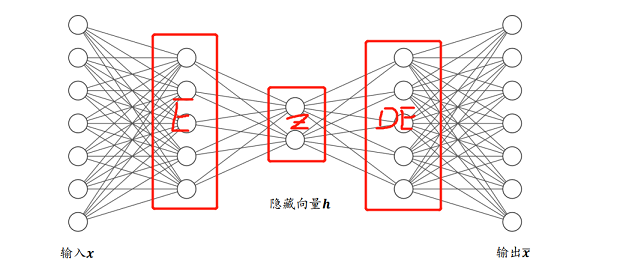

自编码器能够将输入变换到隐藏向量𝒛，并通过解码器重建(Reconstruct，或恢复)出$\bar{x}$ 。我们希望解码器的输出能够完美地或者近似恢复出原来的输入，即𝒙 ≈ $\bar{x}$

$$\bar{x}=h_{\theta_2}(g_{\theta_1}(x))$$

优化目标：$$ Minimize ~ ℒ = dist(𝒙,\bar{x})$$

其中$dist(𝒙,\bar{x})$表示𝒙和$\bar{x}$的距离度量，称为重建误差函数。最常见的度量方法有欧氏距离(Euclidean distance)的平方.如  
$$ℒ =\sum_{i}(x_i,\bar{x_i})^2$$

借助于深层神经网络的非线性特征提取能力，自编码器可以获得良好的数据表示，相对于 PCA 等线性方法，自编码器性能更加优秀，甚至可以更加完美的恢复出输入𝒙。

## 2.自编码器变种
一般而言，自编码器网络的训练较为稳定，但是由于损失函数是直接度量重建样本与真实样本的底层特征之间的距离，而不是评价重建样本的逼真度和多样性等抽象指标，因此在某些任务上效果一般，如图片重建，容易出现重建图片边缘模糊，逼真度相对真实图片仍有不小差距。为了尝试让自编码器学习到数据的真实分布，产生了一系列的自编码器变种网络。

### 2.1Denoising Auto-Encoder
为了防止神经网络记忆住输入数据的底层特征，Denoising Auto-Encoders 给输入数据添加随机的噪声扰动，如给输入𝒙添加采样自高斯分布的噪声𝜀：
$$𝑥̃ = 𝑥 + 𝜀, 𝜀\sim 𝒩(0, var)$$
添加噪声后，网络需要从𝒙̃学习到数据的真实隐藏变量z，并还原出原始的输入𝒙.  
优化目标: $$Minimize ~ ℒ = dist(h_{\theta_2}(g_{\theta_1}(\bar{x})),x)$$

### 2.2Dropout Auto-Encoder  
自编码器网络同样面临过拟合的风险，Dropout Auto-Encoder 通过随机断开网络的连接来减少网络的表达能力，防止过拟合。Dropout Auto-Encoder 实现非常简单，通过在网络层中插入 Dropout 层即可实现网络连接的随机断开。

### 2.3 Adversarial Auto-Encoder
为了能够方便地从某个已知的先验分布中𝑝(𝒛)采样隐藏变量𝒛，方便利用𝑝(𝒛)来重建输入，对抗自编码器(Adversarial Auto-Encoder)利用额外的判别器网络(Discriminator，简称 D网络)来判定降维的隐藏变量𝒛是否采样自先验分布𝑝(𝒛)，如图 12.10 所示。**判别器网络的输出为一个属于[0,1]区间的变量，表征隐藏向量是否采样自先验分布𝑝(𝒛)**：所有采样自先验分布𝑝(𝒛)的𝒛标注为真，采样自编码器的条件概率𝑞(𝒛|𝒙)的𝒛标注为假。通过这种方式训练，除了可以重建样本，还可以约束条件概率分布𝑞(𝒛|𝒙)逼近先验分布𝑝(𝒛)。
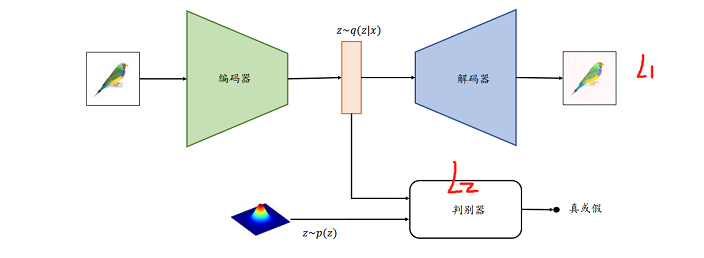

## 3.变分自编码器(VAE)
基本的自编码器本质上是学习输入𝒙和隐藏变量𝒛之间映射关系，它是一个判别模型(Discriminative model)，并不是生成模型(Generative model)。那么能不能将自编码器调整为生成模型，方便地生成样本呢？  
给定隐藏变量的分布P(𝒛)，如果可以**学习到条件概率分布P(𝒙|𝒛)**，则通过对联合概率分布P(𝒙, 𝒛) = P(𝒙|𝒛)P(𝒛)进行采样，生成不同的样本。变分自编码器(Variational Auto Encoders，简称 VAE)就可以实现此目的.  
VAE 模型对隐变量𝒛的分布有显式地约束，希望隐变量𝒛符合预设的先验分布P(𝒛)。因此，在损失函数的设计上，除了原有的重建误差项外，还添加了隐变量𝒛分布的约束项。

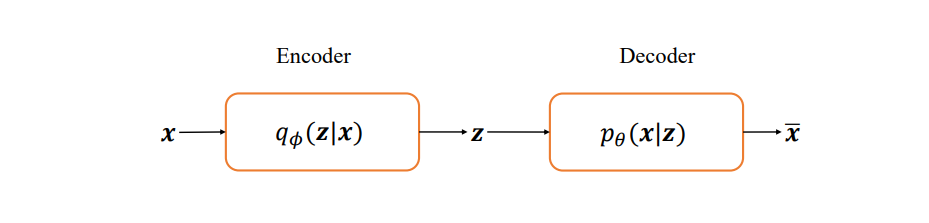

### 3.1VAE原理

从概率的角度，我们假设任何数据集都采样自某个分布𝑝(𝒙|𝒛)，𝒛是隐藏变量，代表了某种内部特征，比如手写数字的图片𝒙，𝒛可以表示字体的大小、书写风格、加粗、斜体等设定，它符合某个先验分布𝑝(𝒛)，在给定具体隐藏变量𝒛的情况下，我们可以**从学到了分布𝑝(𝒙|𝒛)中采样一系列的生成样本，这些样本都具有𝒛所表示的共性。**

通常可以假设𝑝(𝒛)符合已知的分布，比如𝒩(0,1)。在𝑝(𝒛)已知的条件下，我们的目的就是**希望能学会生成概率模型𝑝(𝒙|𝒛)**。

### 3.2VAE推导

学习目标：生成概率模型$p(x|z)$  
优化目标：采用最大似然估计(Maximum Likelihood Estimation)方法：一个好的模型，应该拥有很大的概率生成真实的样本𝒙 ∈ 𝔻。如果我们的生成模型𝑝(𝒙|𝒛)是用𝜃来参数化，则优化目标为  
$$\underset {\theta}{max} ~ p(x)=\int_z p(x,z)=\int_z p(x|z)p(z)dz$$  
由于z是高维并且连续，因此造成积分难问题，导致p(x)无法求解。  
同样由于$p(z|x)=\frac{p(x,z)}{p(x)}=\frac{p(x|z)p(z)}{p(x)}$,导致p(x|z)无法求解.  
在p(z)已知的情况下，我们可以根据神经网络来推断出p(z|x)，p(x)的分布，但是我们无法具体求解，这也导致神经网络无法进行反向传播进行参数优化来优化模型。  
这个时候我们需要采用变分推断的方法，寻找容易表达和求解的分布$q_\phi(z|x)$，当$q_\phi(z|x)$和$p(z|x)$的差距很小的时候，$q_\phi(z|x)$就可以作为$p(z|x)$的近似分布，成为输出结果。因此我们需要用$q_\phi(z|x)$来逼近$p(z|x)$，即最小化$q_\phi(z|x)$和$p(z|x)$之间的距离。  
$$\underset {\phi}{min} ~ 𝔻_{𝐾𝐿}(𝑞_\phi(𝒛|𝒙)\parallel 𝑝(𝒛|𝒙))$$

其中KL散度$𝔻_{𝐾𝐿}$是一种衡量分布$𝑞_\phi(𝒛|𝒙)$和$𝑝(𝒛|𝒙)$之间的差距的度量，定义为  
$$𝔻_{𝐾𝐿}(𝑞(𝒙)\parallel 𝑝(𝒙))=\int_xq(x)log\frac{q(x)}{p(x)}dx$$  
因此$$𝔻_{𝐾𝐿}(𝑞_\phi(𝒛|𝒙)\parallel 𝑝(𝒛|𝒙))=\int_z𝑞_\phi(𝒛|𝒙)log\frac{𝑞_\phi(𝒛|𝒙)}{𝑝(𝒛|𝒙)}dz$$  
利用性质$$𝑝(𝒙, 𝒛)=𝑝(𝒛|𝒙) ∙ 𝑝(𝒙)$$  
可得$$𝔻_{𝐾𝐿}(𝑞_\phi(𝒛|𝒙)\parallel 𝑝(𝒛|𝒙))=\int_z𝑞_\phi(𝒛|𝒙)log\frac{𝑞_\phi(𝒛|𝒙)p(x)}{𝑝(𝒛|𝒙)p(x)}dz\\=\int_z𝑞_\phi(𝒛|𝒙)log\frac{𝑞_\phi(𝒛|𝒙)p(x)}{𝑝(x,z)}dz\\=\int_z𝑞_\phi(𝒛|𝒙)log\frac{𝑞_\phi(𝒛|𝒙)}{𝑝(x,z)}dz+\int_z𝑞_\phi(𝒛|𝒙)log~ p(x)dz ~ ~ ~ ~ (其中\int_z𝑞_\phi(𝒛|𝒙)dz=1)\\=\int_z𝑞_\phi(𝒛|𝒙)log\frac{𝑞_\phi(𝒛|𝒙)}{𝑝(x,z)}dz+log~ p(x)\\=-\big(-\int_z𝑞_\phi(𝒛|𝒙)log\frac{𝑞_\phi(𝒛|𝒙)}{𝑝(x,z)}dz\big)+log~ p(x)$$
    
我们将$-\int_z𝑞_\phi(𝒛|𝒙)log\frac{𝑞_\phi(𝒛|𝒙)}{𝑝(x,z)}dz$定义为ℒ(𝜙, 𝜃)，因此  
$$𝔻_{𝐾𝐿}(𝑞_\phi(𝒛|𝒙)\parallel 𝑝(𝒛|𝒙))=-ℒ(𝜙, 𝜃)++log~ p(x)$$  
且$$𝔻_{𝐾𝐿}(𝑞_\phi(𝒛|𝒙)\parallel 𝑝(𝒛|𝒙))\geq 0$$
因此$$ℒ(𝜙, 𝜃) ≤ log 𝑝 (𝒙)$$  
也就是说，ℒ(𝜙, 𝜃)是log 𝑝 (𝒙)的下界限(Lower Bound)，优化目标ℒ(𝜙, 𝜃)称为 Evidence Lower Bound Objective(ELBO)。我们是目标是最大化似然概率𝑝(𝒙)，或最大化log 𝑝 (𝑥)，那么可以通过最大化其下界限ℒ(𝜙, 𝜃)实现。

如何最大化ℒ(𝜙, 𝜃)函数呢 ？  
$$ℒ(𝜙, 𝜃)=-\int_z𝑞_\phi(𝒛|𝒙)log\frac{𝑞_\phi(𝒛|𝒙)}{𝑝(x,z)}dz\\=\int_z𝑞_\phi(𝒛|𝒙)log\frac{𝑝(x,z)}{𝑞_\phi(𝒛|𝒙)}dz\\=\int_z𝑞_\phi(𝒛|𝒙)log\frac{𝑝_\theta(x|z)p(z)}{𝑞_\phi(𝒛|𝒙)}dz\\=-\int_z𝑞_\phi(𝒛|𝒙)log\frac{𝑞_\phi(𝒛|𝒙)}{p(z)}dz+\int_z𝑞_\phi(𝒛|𝒙)log ~ 𝑝_\theta(x|z)dz\\= −𝔻_{𝐾𝐿} (𝑞_{\phi}(𝒛|𝒙)\parallel 𝑝(𝒛)) + 𝔼_{𝒛\sim 𝑞}[log ~ 𝑝_𝜃(𝒙|𝒛)]$$
  
因此要想最大化ℒ(𝜙, 𝜃)则需要$$min ~ 𝔻_{𝐾𝐿} (𝑞_{\phi}(𝒛|𝒙)\parallel 𝑝(𝒛))$$ 
和 
$$max ~𝔼_{𝒛\sim 𝑞}[log ~  𝑝_𝜃(𝒙|𝒛)]$$.   

第一项优化目标可以理解为约束隐变量𝒛的分布，第二项优化目标理解为在给定Encoder的输出q(z∣x)的情况下，Decoder输出p(x|z)的值要尽可能高，提高网络的重建效果。

那么VAE的loss是什么呢？
$$ℒoss=Recon\_loss+KL\_loss ~ ~ ~ (1)$$  
第一项是重建损失Recon_Loss，表示的是输出数据分布和原始数据的接近程度，通过将 Decoder 的均值输出μ(x)同原始x的值尽可能的近，从而使p(x|z)的观测概率更大，可以基于自编码器中的重建误差函数实现；  
第二项是正则项KL散度KL_loss，是后验概率$q_\phi (z|x)$和先验概率p(z)的接近程度.
$$KL\_loss=𝔻_{𝐾𝐿} (𝑞_{\phi}(𝒛|𝒙)\parallel 𝑝(𝒛))=log\frac{𝜎_2}{𝜎_1}+\frac{𝜎_1^2 + (𝜇_1 − 𝜇_2)^2}{2𝜎_2^2} −\frac{1}{2}$$
$$其中𝑞_{\phi}(𝒛|𝒙)\sim N(𝜇_1,𝜎_1),p(𝒛)\sim N(𝜇_2,𝜎_2)$$

### 3.3Reparameterization Trick
隐变量z采样自编码器的输出$𝑞_\phi(z|𝑥)$。当$𝑞_\phi(z|𝑥)$和𝑝(z)都假设为正态分布时，编码器输出正态分布的均值𝜇和方差$𝜎^2$，解码器的输入采样自$𝒩(𝜇, 𝜎^2)$。由于采样操作的存在，导致梯度传播是不连续的，无法通过梯度下降算法端到端式地训练 VAE 网络。  
如何解决这个问题呢？  
通过**z=𝜇 + 𝜎⊙𝜀方式采样隐变量z**，其中$\frac{𝜕𝑧}{𝜕𝜇}$和$\frac{𝜕𝑧}{𝜕𝜎}$均是连续可导，从而将梯度传播连接起来。𝜀变量采样自标准正态分布𝒩(0,𝐼)，𝜇和𝜎由编码器网络产生，通过z=𝜇+𝜎⊙𝜀方式即可获得采样后的隐变量z，同时保证梯度传播是连续的。

### 3.4VAE模型
输入𝒙通过编码器网络$q_\phi(𝒛|𝒙)$计算得到隐变量𝒛的均值与方差，通过Reparameterization Trick方式采样获得隐变量𝒛，并送入解码器网络，获得分布$𝑝_𝜃(𝒙|𝒛)$，并通过式(1)计算误差并优化参数。

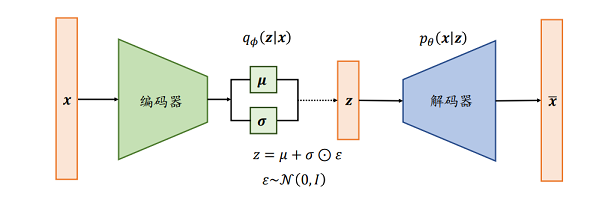